In [1]:
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.3 MB/s eta 0:00:00


In [2]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.3/591.3 KB 51.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
from pyvi import ViTokenizer
import re
import string
import codecs
import matplotlib.pyplot as plt
import nltk
from underthesea import word_tokenize
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/linh ting/doan2/rating.csv')
df=df[["Column3","Column4"]]
df.columns=['label','text']
df.head()

,label,text
0,1,Áo đẹp lắm giao đúng cỡ mặc thoải mái hài lòng
1,1,Chất liệu: vải mỏng ạ Màu sắc: trắng Đúng vớ...
2,1,Chất liệu: ok Màu sắc: ok Đúng với mô tả: ok...
3,1,Chất liệu: vair gif as ko bieets dduowjc Màu ...
4,1,Hàng hơi rộng Okk mẹ tao nói chuyện với em có...


In [6]:
df["label"]=df["label"].replace(5,0)
df["label"]=df["label"].replace(4,0)
df["label"]=df["label"].replace(3,1)
df["label"]=df["label"].replace(2,1)

In [7]:
seq_len=[len(line) for line in df["text"]]

In [8]:
pd.DataFrame(seq_len).describe()

,0
count,5919.000000
mean,50.476939
std,45.887903
min,1.000000
25%,14.000000
50%,40.000000
75%,73.000000
max,420.000000


In [9]:
df['label'].value_counts()

1    5617
0     302
Name: label, dtype: int64

In [12]:
import string
def clean_document(doc):
    doc = ViTokenizer.tokenize(doc) #Pyvi Vitokenizer library
    doc = doc.lower() #Lower
    tokens = doc.split() #Split in_to words
    table = str.maketrans('', '', string.punctuation.replace("_", "")) #Remove all punctuation
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word]
    return tokens

In [23]:
for i in range(len(seq_len)):
  df['text_token'][i] = clean_document(df['text'][i])

<ipython-input-23-584a69c714c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_token'][i] = clean_document(df['text'][i])


In [24]:
df

,label,text,text_token
0,1,Áo đẹp lắm giao đúng cỡ mặc thoải mái hài lòng,"[áo, đẹp, lắm, giao, đúng, cỡ, mặc, thoải_mái,..."
1,1,Chất liệu: vải mỏng ạ Màu sắc: trắng Đúng vớ...,"[chất_liệu, vải, mỏng, ạ, màu_sắc, trắng, đúng..."
2,1,Chất liệu: ok Màu sắc: ok Đúng với mô tả: ok...,"[chất_liệu, ok, màu_sắc, ok, đúng, với, mô_tả,..."
3,1,Chất liệu: vair gif as ko bieets dduowjc Màu ...,"[chất_liệu, vair, gif, as, ko, bieets, dduowjc..."
4,1,Hàng hơi rộng Okk mẹ tao nói chuyện với em có...,"[hàng, hơi, rộng, okk, mẹ, tao, nói_chuyện, vớ..."
...,...,...,...
5914,0,Shop làm việc thái độ tệ với khách hàng10,"[shop, làm_việc, thái_độ, tệ, với, khách, hàng10]"
5915,0,Hàng cc,[hàng_cc]
5916,0,Chửi khách,[chửi_khách]
5917,0,Ko đẹp,[ko_đẹp]


In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
from string import digits
from collections import Counter
from pyvi import ViTokenizer
from keras.utils.np_utils import to_categorical
%matplotlib inline
import random
from gensim.models import Word2Vec,KeyedVectors

In [14]:
df['text_token'] = df['text'].apply(word_tokenize)

In [ ]:
from gensim.topic_coherence.text_analysis import Word2Vec
# CBOW
model_w2v=Word2Vec(df['text_token'],min_count=1,size=300,window=5,sg=0)
model_w2v.build_vocab(df['text_token'],update=True)
model_w2v.train(df['text_token'],total_examples=model_w2v.corpus_count,epochs=300)
model_w2v.save('custom_w2v_bin')

In [18]:
word_vectors = KeyedVectors.load('/content/drive/MyDrive/linh ting/doan2/custom_w2v.bin')

In [20]:
word_vectors.most_similar(positive=['tốt'],topn=10)

<ipython-input-20-18bc79aefc8d>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  word_vectors.most_similar(positive=['tốt'],topn=10)


[('đẹp', 0.6037566065788269),
 ('đúng', 0.5678170323371887),
 ('ok', 0.49353307485580444),
 ('chất_liệu', 0.48000669479370117),
 ('mô_tả', 0.4740285277366638),
 ('hàng', 0.46615952253341675),
 ('giao', 0.457184374332428),
 ('sản_phẩm', 0.4270055294036865),
 ('tuyệt_vời', 0.39961355924606323),
 ('với', 0.39947277307510376)]

In [21]:
EMBEDDING_DIM = 300
MAX_VOCAB_SIZE = 21960
MAX_SEQUENCE_LENGTH = 50

In [22]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [25]:
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE,filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ',oov_token='<OOV>')
tokenizer.fit_on_texts(df['text_token'])

In [26]:
sequences_train=tokenizer.texts_to_sequences(df['text_token'])
word_index= tokenizer.word_index

data=pad_sequences(sequences_train,maxlen=MAX_SEQUENCE_LENGTH,truncating='post',padding='post')

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, df['label'], test_size=0.3, random_state=42)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [29]:
X_train

array([[   6,   26,   13, ...,    0,    0,    0],
       [   4, 2265,  617, ...,  150,   28,  113],
       [   8,    2,   98, ...,    0,    0,    0],
       ...,
       [ 192,    0,    0, ...,    0,    0,    0],
       [  10, 1922,   17, ...,    0,    0,    0],
       [   4,  326,    6, ...,    0,    0,    0]], dtype=int32)

In [28]:
print(X_train.shape)
print(y_train.shape)

(4143, 50)
(4143,)


CNN

In [33]:
from nltk.lm import vocabulary
import gensim
from gensim.models import word2vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

vocabulary_size=min(len(word_index)+1,MAX_VOCAB_SIZE)
vocabulary_size


5482

In [34]:
word_notexist=[]

embedding_matrix=np.zeros((vocabulary_size,EMBEDDING_DIM))

for word,i in word_index.items():
  if i>=MAX_VOCAB_SIZE:
    continue
  try:
    embedding_vector=word_vectors[word]
    embedding_matrix[i]=embedding_vector
  except KeyError :
    try:
      embedding_matrix=np.random.normal(0,np.sqrt(0,25),EMBEDDING_DIM)
      word_notexist.append(word)
    except:
      pass
del(word_vectors)

from keras.layers import Embedding
embedding_layer=Embedding(vocabulary_size,EMBEDDING_DIM,weights=[embedding_matrix],
                          trainable=True)

<ipython-input-34-9f4563703337>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_vector=word_vectors[word]


In [35]:
from keras.layers import Dense,Input,GlobalMaxPool1D
from keras.layers import Conv1D,MaxPooling1D, Embedding,MaxPooling2D,Flatten,Dropout
from keras.models import Model
from keras.layers import Input,Conv2D,Dropout,concatenate,Reshape
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras import backend as K

import tensorflow as tf

sequence_length=data.shape[1]
filter_sizes=[3,4,5]
num_filters=100
drop=0.5

inputs=Input(shape=(sequence_length,))
embedding=embedding_layer(inputs)
reshape = Reshape((sequence_length,1,EMBEDDING_DIM))(embedding)

conv_0 = Conv2D(num_filters,(filter_sizes[0],1),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters,(filter_sizes[1],1),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv2D(num_filters,(filter_sizes[2],1),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0=MaxPooling2D((sequence_length-filter_sizes[0]+1,1),strides=(1,1))(conv_0)
maxpool_1=MaxPooling2D((sequence_length-filter_sizes[1]+1,1),strides=(1,1))(conv_1)
maxpool_2=MaxPooling2D((sequence_length-filter_sizes[2]+1,1),strides=(1,1))(conv_2)

merged_tensor=concatenate([maxpool_0,maxpool_1,maxpool_2],axis=1)
# merged_tensor=concatenate([maxpool_0],axis=1)
flatten=Flatten()(merged_tensor)
reshape=Reshape((3*num_filters,))(flatten)
dropout=Dropout(drop)(flatten)
output=Dense(units=1,activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)

cnn_model=Model(inputs,output)

ad=tf.keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon='le-08',decay=0.0)
cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 300)      1644600     ['input_2[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 50, 1, 300)   0           ['embedding[0][0]']              
                                                                                                  
 conv2d (Conv2D)                (None, 48, 1, 100)   90100       ['reshape[0][0]']                
                                                                                              

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
cnn_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=256,shuffle=True)
cnn_model.fit(X_train,y_train,epochs=5,batch_size=256,shuffle=True)

Epoch 1/3
17/17 [==============================] - 15s 92ms/step - loss: 3.8063 - accuracy: 0.9471 - val_loss: 3.0622 - val_accuracy: 0.9533
Epoch 2/3
17/17 [==============================] - 0s 20ms/step - loss: 2.6953 - accuracy: 0.9471 - val_loss: 2.3863 - val_accuracy: 0.9533
Epoch 3/3
17/17 [==============================] - 0s 21ms/step - loss: 2.3637 - accuracy: 0.9471 - val_loss: 2.4329 - val_accuracy: 0.9533
Epoch 1/5
17/17 [==============================] - 0s 24ms/step - loss: 2.6494 - accuracy: 0.9471
Epoch 2/5
17/17 [==============================] - 0s 17ms/step - loss: 3.5116 - accuracy: 0.9471
Epoch 3/5
17/17 [==============================] - 0s 17ms/step - loss: 4.9930 - accuracy: 0.9471
Epoch 4/5
17/17 [==============================] - 0s 17ms/step - loss: 7.3951 - accuracy: 0.9471
Epoch 5/5
17/17 [==============================] - 0s 18ms/step - loss: 10.7373 - accuracy: 0.9471


In [37]:
results = cnn_model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

14/14 [==============================] - 1s 25ms/step - loss: 12.8968 - accuracy: 0.9533
test loss, test acc: [12.896772384643555, 0.9532657861709595]


In [38]:
cnn_model.save("/content/drive/MyDrive/linh ting/doan2/cnn_model")

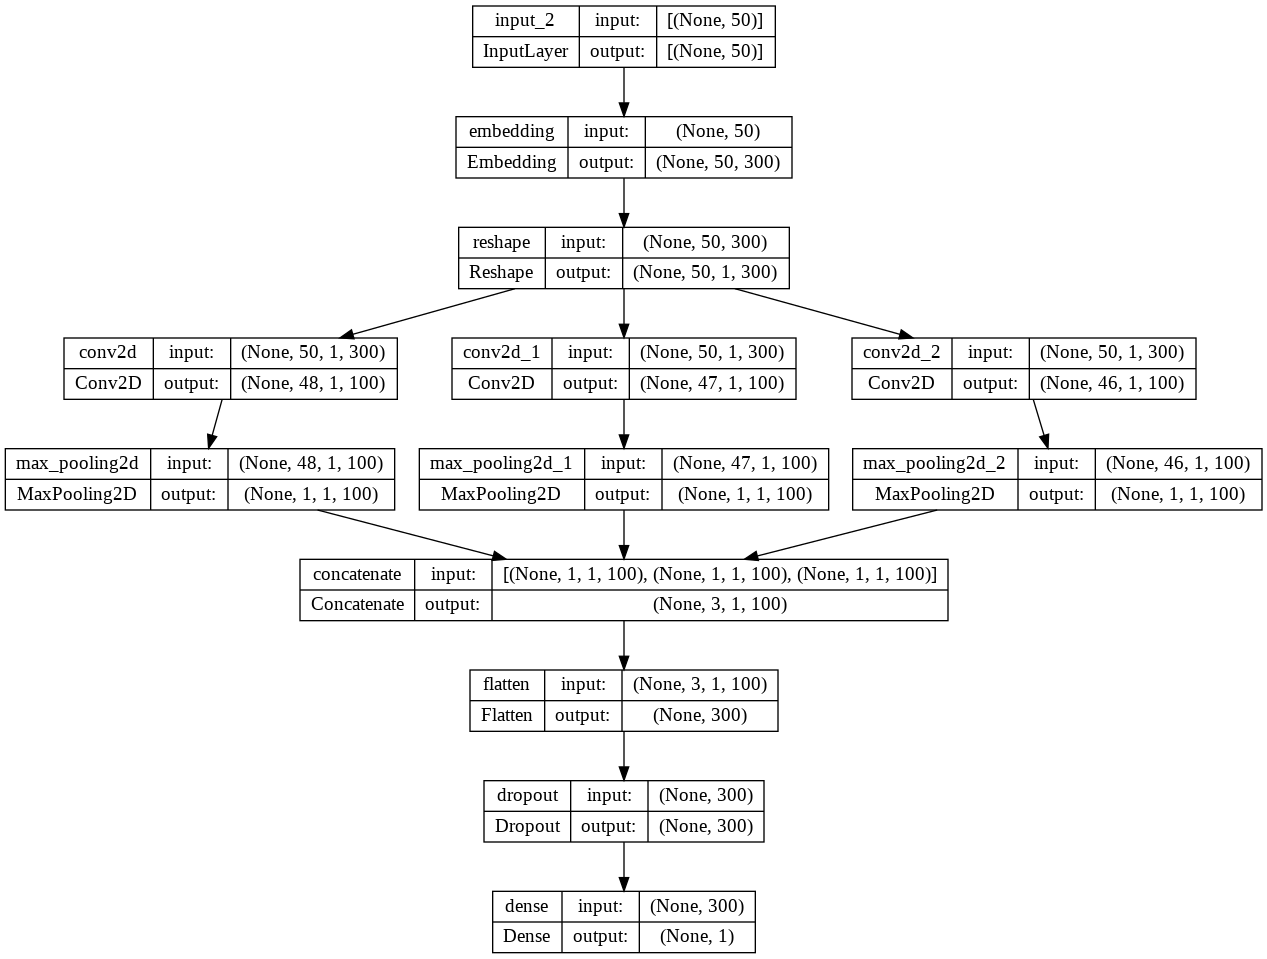

In [39]:
dot_img='/content/drive/MyDrive/linh ting/doan2/model_visualize.png'
tf.keras.utils.plot_model(cnn_model,dot_img,show_shapes=True)

In [ ]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.layers import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string

BERT

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 38.0 MB/s 
     |████████████████████████████████| 182 kB 66.2 MB/s 
     |████████████████████████████████| 7.6 MB 53.7 MB/s 


In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification

Creating Data Loaders

In [ ]:
df

,label,text,text_token
0,1,áo đẹp lắm giao đúng cỡ mặc thoải mái hài,"[áo, đẹp, lắm, giao, đúng, cỡ, mặc, thoải mái,..."
1,1,chất liệu vải mỏng màu sắc trắng đúng mô tả ok...,"[chất liệu, vải, mỏng, màu sắc, trắng, đúng, m..."
2,1,chất liệu ok màu sắc ok đúng mô tả ok áo hơi mỏng,"[chất liệu, ok, màu sắc, ok, đúng, mô tả, ok, ..."
3,1,chất liệu vair gif as ko bieets dduowjc màu sắ...,"[chất liệu, vair, gif, as, ko, bieets, dduowjc..."
4,1,hàng hơi rộng okk mẹ tao đi ko forget that we ...,"[hàng, hơi, rộng, okk, mẹ, tao, đi, ko, forget..."
...,...,...,...
5914,0,shop thái độ tệ hàng10,"[shop, thái độ, tệ, hàng10]"
5915,0,hàng cc,"[hàng, cc]"
5916,0,chửi,[chửi]
5917,0,ko đẹp,"[ko, đẹp]"


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.text.values, 
                                                  df.label.values, 
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

In [ ]:
X_train

array(['đẹp', 'chất liệu đc màu sắc đẹp đúng mô tả được5',
       'chất liệu đẹp màu sắc trăng đúng mô tả đúng mô tả xịn', ...,
       'chất liệu kaki màu sắc xanh rêu đúng mô tả 90 màu hơi đâm ảnh',
       '65kg mặc size 2xl cảm hơi bé mua 1 size ổn8', 'dep'], dtype=object)

In [ ]:
df['data_type'] = ['not_set']*df.shape[0]


In [ ]:
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
label_dict = {0:'xau',
              1:'tot'}
label_dict.items()


dict_items([(0, 'xau'), (1, 'tot')])

In [ ]:
import torch
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

Setting Up Optimiser and Scheduler

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
epochs = 3

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

Defining our Performance Metrics

In [ ]:
from sklearn.metrics import f1_score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

Creating our Training Loop

In [ ]:
import random
import torch

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

cpu

In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cuda().numpy()
        label_ids = inputs['labels'].cuda().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)             
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    # val_loss, predictions, true_vals = evaluate(dataloader_validation)
    # val_f1 = f1_score_func(predictions, true_vals)
    # tqdm.write(f'Validation loss: {val_loss}')
    # tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/148 [00:00<?, ?it/s]

AttributeError: ignored

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
    val_loss, predictions, true_vals = evaluate(dataloader_validation).argmax(1).cpu().numpy()
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

TypeError: ignored

In [ ]:
model.save_pretrained("/content/drive/MyDrive/linh ting/doan2/bert_model")

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/linh ting/doan2/bert_model/pytorch_model.bin', map_location=torch.device('cuda')))

<All keys matched successfully>

In [ ]:
model.predict("san pham tot")

AttributeError: ignored

In [ ]:
_, predictions, true_vals = evaluate(dataloader_validation)

In [ ]:
accuracy_per_class(predictions, true_vals)

SVM

In [40]:
from sklearn.svm import LinearSVC

In [49]:
svm_model =LinearSVC(C=0.1)
svm_model.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.1)

In [50]:
svm_model.score(X_test, y_test)

0.8930180180180181

In [55]:
import pickle
pickle.dump(svm_model, open('svm_model.h', 'wb'))